In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras.layers as tfl

In [2]:
data = pd.read_csv("UrbanSound8K.csv")

In [3]:
data

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
...,...,...,...,...,...,...,...,...
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn


In [4]:
first = data.iloc[:, 0].values
last = data.iloc[:, -2].values

In [5]:
my_dict = dict(zip(first, last))

In [6]:
y = []
X = []
directory = "Spectrograms/All"
for filename in os.listdir(directory):
    
    image_path = os.path.join(directory, filename)
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (128,128))
    
    X.append(image)
    y.append(my_dict[os.path.splitext(filename)[0] + '.wav'])
    

X = np.array(X)
y = np.array(y)

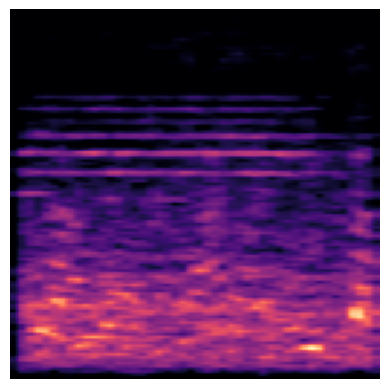

In [7]:
idx = 10
plt.imshow(X[idx], cmap ='magma')
plt.axis('off')
plt.show()

In [8]:
X = X.astype('float32')
X /= 255.0

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [10]:
class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % 10 == 0:
            print(f'Epoch {epoch + 1}, loss: {logs["loss"]}, accuracy: {logs["accuracy"]}')

In [11]:
def myModel():

    model = tf.keras.Sequential([

        tf.keras.Input(shape=(128, 128, 1)),
        tfl.Conv2D(filters = 16, kernel_size=7, padding='same'),
        tfl.BatchNormalization(axis = 3),
        tfl.ReLU(),
        tfl.MaxPooling2D(),
        
        tfl.Conv2D(filters = 32, kernel_size=7, padding='same'),
        tfl.BatchNormalization(axis = 3),
        tfl.ReLU(),
        tfl.MaxPooling2D(),

        tfl.Conv2D(filters = 64, kernel_size=7, padding='same'),
        tfl.BatchNormalization(axis = 3),
        tfl.ReLU(),
        tfl.MaxPooling2D(),
        
        tfl.Flatten(),
        tfl.Dense(128, activation='relu'),
        tfl.Dropout(0.4),
        tfl.Dense(10, activation='softmax')

    ])
    
    return model

In [12]:
model = myModel()

In [13]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0003),
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 16)        │             800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128, 128, 16)        │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu (ReLU)                         │ (None, 128, 128, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 32)          │          25,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64, 64, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_1 (ReLU)                       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 64)          │         100,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_2 (ReLU)                       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       2,097,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,225,354 (8.49 MB)

 Trainable params: 2,225,130 (8.49 MB)

 Non-trainable params: 224 (896.00 B)

In [15]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, callbacks=[CustomCallback()], verbose=0)

Epoch 10, loss: 0.6701135635375977, accuracy: 0.754473865032196
Epoch 20, loss: 0.4472949504852295, accuracy: 0.8181818127632141
Epoch 30, loss: 0.33009231090545654, accuracy: 0.8635647892951965
Epoch 40, loss: 0.2707030773162842, accuracy: 0.8846098780632019
Epoch 50, loss: 0.23411206901073456, accuracy: 0.8966356515884399
Epoch 60, loss: 0.22599312663078308, accuracy: 0.9029348492622375
Epoch 70, loss: 0.1961907595396042, accuracy: 0.9188260436058044
Epoch 80, loss: 0.1887788623571396, accuracy: 0.9201145172119141
Epoch 90, loss: 0.1531887948513031, accuracy: 0.938010036945343
Epoch 100, loss: 0.1438145488500595, accuracy: 0.937723696231842


In [16]:
model.evaluate(X_test, y_test)

55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.9391 - loss: 0.3961


[0.4183517396450043, 0.9336004853248596]

Text(0, 0.5, 'Loss')

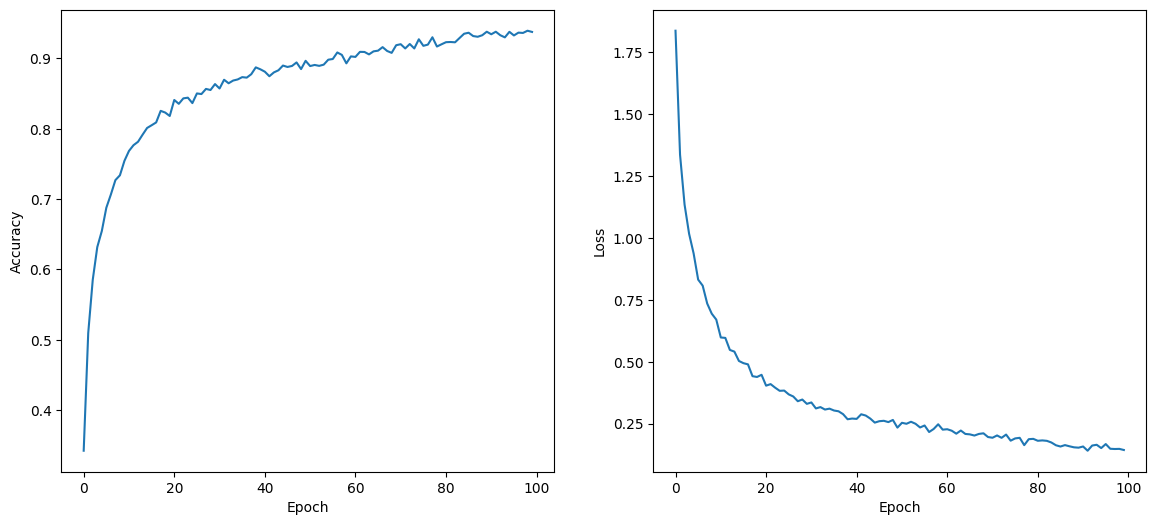

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
axes[0].plot(history.history['accuracy'])
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[1].plot(history.history['loss'])
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')